In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from functools import reduce
import seaborn as sns
from sklearn.ensemble import IsolationForest,RandomForestRegressor,GradientBoostingRegressor

In [2]:
df1=pd.read_csv('blane_before_hpgr.csv')

In [3]:
df1.insert(loc=0, column='new_date', value=df1['Date']+' '+df1['Time'])

In [4]:
df1['new_date']=pd.to_datetime(df1['new_date'])
df1['new_date']=df1['new_date']-timedelta( minutes=0, hours=7)
df1['new_date']=df1['new_date'].dt.date
df1.drop(['Date','Time'],axis=1,inplace=True)
df1=df1.groupby(['new_date']).mean()


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 974 entries, 2019-03-20 to 2022-02-22
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Blane_before_hpgr  974 non-null    float64
dtypes: float64(1)
memory usage: 15.2+ KB


In [6]:
df2=pd.read_csv('blane_after_hpgr.csv')

In [7]:
df2.insert(loc=0, column='new_date', value=df2['Date']+' '+df2['Time'])

In [8]:
df2['new_date']=pd.to_datetime(df2['new_date'])
df2['new_date']=df2['new_date']-timedelta( minutes=0, hours=7)
df2['new_date']=df2['new_date'].dt.date
df2.drop(['Date','Time'],axis=1,inplace=True)
df2=df2.groupby(['new_date']).mean()


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 2019-03-20 to 2022-02-22
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Blane_after_hpgr  976 non-null    float64
dtypes: float64(1)
memory usage: 15.2+ KB


In [10]:
df3=pd.read_csv('area600.csv')

In [11]:
df3.insert(loc=0, column='new_date', value=df3['Date']+' '+df3['Time'])

In [12]:
df3['new_date']=pd.to_datetime(df3['new_date'])
df3['new_date']=df3['new_date']-timedelta( minutes=0, hours=7)
df3['new_date']=df3['new_date'].dt.date
df3.drop(['Date','Time'],axis=1,inplace=True)
df3=df3.groupby(['new_date']).mean()

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 2019-03-20 to 2022-02-22
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MC%         979 non-null    float64
 1   Drop        979 non-null    float64
 2   Co_9-16_mm  890 non-null    float64
dtypes: float64(3)
memory usage: 30.6+ KB


In [14]:
df4=pd.read_csv('row-data.csv')

In [15]:
df4['Date']=pd.to_datetime(df4['Date'])
df4['Date']=df4['Date'].dt.date
df4.rename(columns={'Date' : 'new_date'}, inplace=True)
df4=df4.groupby(['new_date']).mean()

In [16]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1067 entries, 2019-01-04 to 2022-12-02
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   710FN3_Damper(%)  1067 non-null   float64
 1   Water_Mix1(m3/h)  1067 non-null   float64
 2   Water_Mix2(m3/h)  1067 non-null   float64
 3   Kiln_Speed(rpm)   1067 non-null   float64
 4   710FN1_Damper(%)  1067 non-null   float64
 5   730FN1_Damper(%)  1067 non-null   float64
 6   Grate_Feed(ton)   1067 non-null   float64
 7   OffGas(deg)       1043 non-null   float64
 8   WF5(t/h)          1067 non-null   float64
 9   WF6(t/h)          1067 non-null   float64
 10  Grate_Speed(rpm)  1067 non-null   float64
dtypes: float64(11)
memory usage: 100.0+ KB


In [17]:
df5=pd.read_csv('area700.csv')

In [18]:
df5.insert(loc=0, column='new_date', value=df5['Date']+' '+df5['Time'])

In [19]:
df5['new_date']=pd.to_datetime(df5['new_date'])
df5['new_date']=df5['new_date']-timedelta( minutes=0, hours=7)
df5['new_date']=df5['new_date'].dt.date
df5.drop(['Date','Time'],axis=1,inplace=True)
df5=df5.groupby(['new_date']).mean()

In [20]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 2019-03-20 to 2022-02-23
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FeO        974 non-null    float64
 1   P_9-16_mm  961 non-null    float64
dtypes: float64(2)
memory usage: 22.9+ KB


In [21]:
data_frames = [df1, df2, df3,df4,df5]
df = reduce(lambda  left,right: pd.merge(left,right,on=['new_date'],how='outer'), data_frames)

In [22]:
df.describe()

Blane_before_hpgr  Blane_after_hpgr         MC%        Drop  \
count         974.000000        976.000000  979.000000  979.000000   
mean         1625.523707       1922.526979    9.043888    4.317780   
std           135.152757        136.915710    0.190926    0.608726   
min          1278.400000       1547.444444    7.966667    1.720000   
25%          1521.877778       1825.840909    8.915192    3.895020   
50%          1636.289773       1910.650000    9.041667    4.297639   
75%          1733.443182       2011.533333    9.174621    4.664722   
max          1970.000000       2370.000000    9.681429    7.526667   

       Co_9-16_mm  710FN3_Damper(%)  Water_Mix1(m3/h)  Water_Mix2(m3/h)  \
count  890.000000       1067.000000       1067.000000       1067.000000   
mean    39.728198         38.078660          3.004208          3.278772   
std      5.516029         14.269039          1.553201          2.609452   
min     17.370167          0.000000          0.000000          0.000000   
25%     36.044569         35.510000          2.020000          2.095000   
50%     40.052515         42.930000          3.150000          3.150000   
75%     43.644855         46.445000          4.090000          4.175000   
max     57.206333        100.000000          7.330000         30.000000   

       Kiln_Speed(rpm)  710FN1_Damper(%)  730FN1_Damper(%)  Grate_Feed(ton)  \
count      1067.000000       1067.000000       1067.000000      1067.000000   
mean          1.473458         46.996345         36.095201     10897.653121   
std           0.431257         17.792247         14.935324      4141.839753   
min           0.000000          0.000000          0.000000       -77.700000   
25%           1.530000         46.990000         33.215000     11410.865000   
50%           1.630000         52.630000         36.310000     12673.010000   
75%           1.680000         57.660000         37.880000     13080.730000   
max           1.780000         74.720000        100.000000     18548.260000   

        OffGas(deg)     WF5(t/h)     WF6(t/h)  Grate_Speed(rpm)         FeO  \
count   1043.000000  1067.000000  1067.000000       1067.000000  974.000000   
mean     850.376855    13.398360    13.554733          5.127470    0.880922   
std      688.691612     7.488141     7.475316          1.959544    0.326644   
min       24.780000     0.000000     0.000000         -0.020000    0.255000   
25%      816.760000     8.070000     8.580000          5.300000    0.670000   
50%      855.050000    15.140000    15.330000          5.830000    0.812262   
75%      890.980000    19.095000    19.275000          6.230000    1.010250   
max    22541.810000    30.220000    29.940000          6.930000    3.570000   

        P_9-16_mm  
count  961.000000  
mean    87.438809  
std      2.428837  
min     78.435000  
25%     85.970000  
50%     87.490000  
75%     88.870000  
max     95.860000

In [23]:
df = df.ffill()

In [24]:
df

Blane_before_hpgr  Blane_after_hpgr       MC%      Drop  \
new_date                                                              
2019-03-20        1721.000000       1917.000000  9.333333  4.545556   
2019-03-21        1677.000000       1875.416667  9.043056  3.736806   
2019-03-22        1664.166667       1944.333333  9.068056  4.198194   
2019-03-23        1664.307692       2014.000000  8.997183  4.894366   
2019-03-24        1640.000000       2036.909091  8.795833  4.649583   
...                       ...               ...       ...       ...   
2022-11-01        1534.400000       1930.000000  9.166667  4.416667   
2022-11-02        1534.400000       1930.000000  9.166667  4.416667   
2022-12-01        1534.400000       1930.000000  9.166667  4.416667   
2022-12-02        1534.400000       1930.000000  9.166667  4.416667   
2022-02-23        1534.400000       1930.000000  9.166667  4.416667   

            Co_9-16_mm  710FN3_Damper(%)  Water_Mix1(m3/h)  Water_Mix2(m3/h)  \
new_date                                                                       
2019-03-20         NaN               NaN               NaN               NaN   
2019-03-21         NaN               NaN               NaN               NaN   
2019-03-22         NaN             34.56              3.77              2.85   
2019-03-23         NaN             34.01              5.68              2.77   
2019-03-24         NaN             28.01              5.07              3.07   
...                ...               ...               ...               ...   
2022-11-01   35.887667             46.71              1.70              1.71   
2022-11-02   35.887667             47.37              2.58              2.56   
2022-12-01   35.887667             46.40              1.99              1.99   
2022-12-02   35.887667             44.69              2.28              2.27   
2022-02-23   35.887667             44.69              2.28              2.27   

            Kiln_Speed(rpm)  710FN1_Damper(%)  730FN1_Damper(%)  \
new_date                                                          
2019-03-20              NaN               NaN               NaN   
2019-03-21              NaN               NaN               NaN   
2019-03-22             1.72             51.00             32.50   
2019-03-23             1.72             51.98             31.96   
2019-03-24             1.72             46.90             31.49   
...                     ...               ...               ...   
2022-11-01             1.60             58.90             47.73   
2022-11-02             1.55             63.04             48.76   
2022-12-01             1.60             60.55             47.83   
2022-12-02             1.54             59.68             47.78   
2022-02-23             1.54             59.68             47.78   

            Grate_Feed(ton)  OffGas(deg)  WF5(t/h)  WF6(t/h)  \
new_date                                                       
2019-03-20              NaN          NaN       NaN       NaN   
2019-03-21              NaN          NaN       NaN       NaN   
2019-03-22         12383.61       827.97     14.54     19.03   
2019-03-23         12413.71       847.22     17.42     16.49   
2019-03-24         12277.02       844.50     17.58     18.08   
...                     ...          ...       ...       ...   
2022-11-01         13917.40       898.75     16.55     16.64   
2022-11-02         13838.00       894.06     20.88     20.90   
2022-12-01         13877.86       894.48     15.87     15.93   
2022-12-02         13390.01       864.99     25.82     25.78   
2022-02-23         13390.01       864.99     25.82     25.78   

            Grate_Speed(rpm)       FeO  P_9-16_mm  
new_date                                           
2019-03-20               NaN  0.700000  89.730000  
2019-03-21               NaN  0.780000  87.116667  
2019-03-22              6.20  0.726667  88.533333  
2019-03-23              5.98  0.826667  86.856667  
2019-03-24              5.98  

In [25]:
df=df[(df['Grate_Feed(ton)'] >6000) & (df['Grate_Feed(ton)'] <14000) ]

In [26]:
df.dropna(how='any',axis=0,inplace=True)

C:\Users\h.alavi\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:title={'center':'Grate Feed (ton)'}, xlabel='new_date', ylabel='Grate_Feed(ton)'>

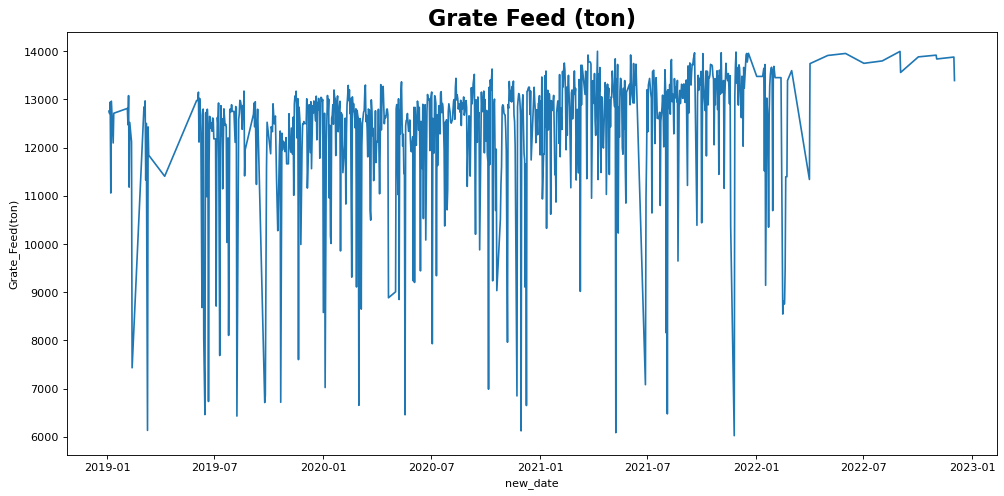

In [27]:
plt.figure(figsize=(15,7),dpi=80)
plt.title('Grate Feed (ton)', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df['Grate_Feed(ton)'], data=df )

In [28]:
df.describe()

Blane_before_hpgr  Blane_after_hpgr         MC%        Drop  \
count         866.000000        866.000000  866.000000  866.000000   
mean         1614.827247       1910.346116    9.061514    4.253921   
std           127.555256        120.903802    0.183618    0.525325   
min          1278.400000       1547.444444    8.437255    2.798194   
25%          1525.609091       1830.022727    8.937847    3.885521   
50%          1609.303030       1913.250000    9.066667    4.279951   
75%          1721.834091       1986.085227    9.169444    4.535262   
max          1970.000000       2370.000000    9.681429    6.339242   

       Co_9-16_mm  710FN3_Damper(%)  Water_Mix1(m3/h)  Water_Mix2(m3/h)  \
count  866.000000        866.000000        866.000000        866.000000   
mean    39.582076         42.621293          3.382506          3.443268   
std      5.378476          5.826236          1.254994          1.332466   
min     17.370167         19.070000          0.250000          0.240000   
25%     35.887667         39.255000          2.492500          2.502500   
50%     39.568903         44.250000          3.375000          3.395000   
75%     43.550000         46.780000          4.180000          4.270000   
max     57.206333         53.210000          7.330000          7.460000   

       Kiln_Speed(rpm)  710FN1_Damper(%)  730FN1_Damper(%)  Grate_Feed(ton)  \
count       866.000000        866.000000        866.000000       866.000000   
mean          1.610635         53.619896         37.557725     12403.480092   
std           0.113054          7.271260          5.693167      1365.552074   
min           0.800000         20.570000         19.200000      6022.400000   
25%           1.550000         50.102500         35.102500     12128.097500   
50%           1.640000         54.270000         36.560000     12790.905000   
75%           1.680000         58.760000         37.950000     13150.880000   
max           1.780000         74.720000         50.480000     13997.600000   

       OffGas(deg)    WF5(t/h)    WF6(t/h)  Grate_Speed(rpm)         FeO  \
count   866.000000  866.000000  866.000000        866.000000  866.000000   
mean    861.014561   15.135554   15.360012          5.848961    0.866529   
std      51.049816    6.117165    6.044539          0.738525    0.330170   
min     625.750000    0.000000    0.000000          2.730000    0.255000   
25%     823.847500   11.450000   11.855000          5.610000    0.660417   
50%     861.515000   16.030000   16.210000          5.945000    0.800000   
75%     898.020000   19.657500   19.825000          6.327500    1.006250   
max     990.770000   30.220000   29.940000          6.930000    3.570000   

        P_9-16_mm  
count  866.000000  
mean    87.391290  
std      2.387653  
min     78.435000  
25%     85.993333  
50%     87.660000  
75%     88.710000  
max     95.860000

In [29]:
col=df.columns
data=df.values
idx=df.index.values

In [30]:
iso = IsolationForest()
yhat = iso.fit_predict(data)
yhat.shape

(866,)

In [31]:
# select all rows that are not outliers
mask = yhat != -1
mask.shape

(866,)

In [32]:
data = data[mask, :]
idx = idx[mask]

In [33]:
df=pd.DataFrame(data,columns=col,index=idx)
df

Blane_before_hpgr  Blane_after_hpgr       MC%      Drop  \
2019-06-01        1851.500000       2204.100000  8.802778  4.976389   
2019-06-02        1838.083333       2197.416667  8.825000  4.508056   
2019-06-03        1814.900000       2205.700000  8.623611  4.351667   
2019-06-04        1811.454545       2172.909091  8.729167  4.569583   
2019-06-05        1845.100000       2250.200000  8.620833  4.302778   
...                       ...               ...       ...       ...   
2022-11-01        1534.400000       1930.000000  9.166667  4.416667   
2022-11-02        1534.400000       1930.000000  9.166667  4.416667   
2022-12-01        1534.400000       1930.000000  9.166667  4.416667   
2022-12-02        1534.400000       1930.000000  9.166667  4.416667   
2022-02-23        1534.400000       1930.000000  9.166667  4.416667   

            Co_9-16_mm  710FN3_Damper(%)  Water_Mix1(m3/h)  Water_Mix2(m3/h)  \
2019-06-01   33.115833             37.30              0.83              0.45   
2019-06-02   38.297083             37.30              0.83              0.45   
2019-06-03   46.954056             37.30              0.83              0.45   
2019-06-04   45.105000             31.35              1.92              2.12   
2019-06-05   45.289167             30.24              1.88              1.65   
...                ...               ...               ...               ...   
2022-11-01   35.887667             46.71              1.70              1.71   
2022-11-02   35.887667             47.37              2.58              2.56   
2022-12-01   35.887667             46.40              1.99              1.99   
2022-12-02   35.887667             44.69              2.28              2.27   
2022-02-23   35.887667             44.69              2.28              2.27   

            Kiln_Speed(rpm)  710FN1_Damper(%)  730FN1_Damper(%)  \
2019-06-01             1.70             48.25             34.80   
2019-06-02             1.70             48.25             34.80   
2019-06-03             1.70             48.25             34.80   
2019-06-04             1.72             48.00             32.75   
2019-06-05             1.70             52.08             32.60   
...                     ...               ...               ...   
2022-11-01             1.60             58.90             47.73   
2022-11-02             1.55             63.04             48.76   
2022-12-01             1.60             60.55             47.83   
2022-12-02             1.54             59.68             47.78   
2022-02-23             1.54             59.68             47.78   

            Grate_Feed(ton)  OffGas(deg)  WF5(t/h)  WF6(t/h)  \
2019-06-01         12977.57       842.32     13.54     13.78   
2019-06-02         12977.57       842.32     13.54     13.78   
2019-06-03         12977.57       842.32     13.54     13.78   
2019-06-04         13149.89       791.81     18.31     19.59   
2019-06-05         12114.67       869.37     17.99     15.58   
...                     ...          ...       ...       ...   
2022-11-01         13917.40       898.75     16.55     16.64   
2022-11-02         13838.00       894.06     20.88     20.90   
2022-12-01         13877.86       894.48     15.87     15.93   
2022-12-02         13390.01       864.99     25.82     25.78   
2022-02-23         13390.01       864.99     25.82     25.78   

            Grate_Speed(rpm)       FeO  P_9-16_mm  
2019-06-01              5.76  1.025000  87.473333  
2019-06-02              5.76  0.744286  86.810000  
2019-06-03              5.76  0.613333  87.706667  
2019-06-04              5.96  0.610000  86.293333  
2019-06-05              5.49  0.483333  87.970000  
...                      ...       ...        ...  
2022-11-01              6.82  0.700000  87.710000  
2022-11-02              6.86  0.700000  87.710000  
2022-12-01              6.80  0.700000  87.710000  
2022-12-02              6.54  0.700000  87.710000  
2022-02-23              6.54  0.700000  87.710000  


<AxesSubplot:title={'center':'Grate Feed (ton)'}, ylabel='Grate_Feed(ton)'>

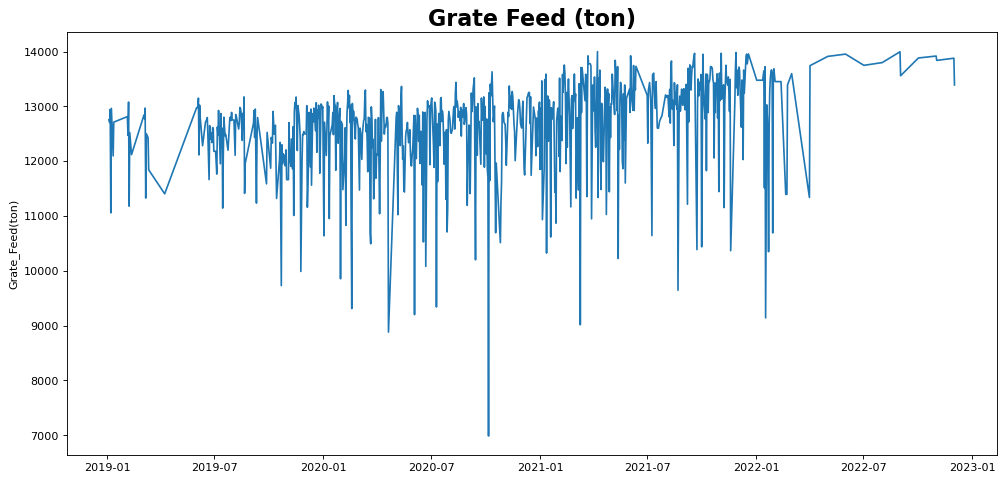

In [34]:
plt.figure(figsize=(15,7),dpi=80)
plt.title('Grate Feed (ton)', fontsize=20,fontweight='bold')
sns.lineplot(x=df.index, y=df['Grate_Feed(ton)'], data=df )